In [14]:
import torch
import sys
sys.path.append("/media/hdd/viscent/SR-UNet")
from models.unet3d.model import BUNet3D,UNet3D

import os 
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import torch.nn as nn
from mpl_toolkits.axes_grid1 import make_axes_locatable
from torchviz import make_dot
from colossalai.utils import load_checkpoint
from colossalai.initialize import launch,initialize
import colossalai
from colossalai.trainer import Trainer, hooks

In [ ]:
# launch('/home/viscent/hdd/viscent/SR-UNet/configs/config_vae_dhcp_dbg.py',0,1,'localhost',11451)

In [67]:
UNET = False
CKPT_DIR = "/home/viscent/hdd/viscent/create-models/fold_0.pt"
# CKPT_DIR = "/home/viscent/hdd/viscent/SR-UNet/experiments/output_vae_dhcp_dbg/checkpoints/fold_0/10.pth"
OUTPUT_ROOT = "/media/hdd/viscent/SR-UNet/inference"
OUTPUT_PREFIX = input("UNet File prefix: ")
OUTPUT_PREFIX = os.path.join(OUTPUT_ROOT,OUTPUT_PREFIX)


if not UNET:
    model = BUNet3D(in_channels=1,
            out_channels=1,
            f_maps=[16, 32, 64, 128, 256],
            layer_order='gcr',
            num_groups=8,
            is_segmentation=False,
            latent_size=256,
            alpha=0.00025,
            )
else:
    model = UNet3D(in_channels=1,
            out_channels=1,
            f_maps=[16, 32, 64, 128, 256],
            layer_order='gcr',
            num_groups=8,
            is_segmentation=False,
    )

############# Initalize #############
model.train()
for x in model.modules():
    if isinstance(x, nn.Conv3d):
        print(x)
        x.requires_grad_(False)
        x.weight.fill_(0)
#####################################

ckpt = torch.load(CKPT_DIR)
# load_checkpoint(CKPT_DIR, model)
# with torch.cuda.amp.autocast(enabled=True):
#     if ckpt.get('model') is None:
#         state_dict = ckpt['state_dict']
#         _state_dict = {}
#         for key in state_dict.keys():
#             _state_dict[key.replace("model.","")] = state_dict[key]
#         model.load_state_dict(_state_dict)
#     else:
model.load_state_dict(ckpt["model"],strict=False)
model.eval()

Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(128, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(384, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(128, 128, kernel_size=(3, 3, 3),

BUNet3D(
  (encoders): ModuleList(
    (0): Encoder(
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(1, 1, eps=1e-05, affine=True)
          (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
        (SingleConv2): SingleConv(
          (groupnorm): GroupNorm(8, 8, eps=1e-05, affine=True)
          (conv): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
      )
    )
    (1): Encoder(
      (pooling): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(8, 16, eps=1e-05, affine=True)
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
       

In [68]:
# optim = torch.optim.Adam(
#     model.parameters(),
#     betas=(0.9, 0.99)
# )
# engine, train_dataloader, test_dataloader, lr_scheduler = colossalai.initialize(
#     model=model,
#     optimizer=optim,
#     verbose=True,)
# trainer = Trainer(engine=engine)

In [69]:
# for k in model.state_dict().keys():
#     if ckpt['model'].get(k) is None:
#         print(k)

In [70]:
# encoder_weights = next(model.encoders[-1].parameters())
# encoder_weights = encoder_weights.cpu().detach().numpy()
# encoder_weights= np.expand_dims(encoder_weights,axis=1)
# encoder_weights = np.repeat(encoder_weights, 128, axis=1)
# if not UNET:
#     fig,(ax1,ax2) = plt.subplots(1,2)
#     im1 = ax1.imshow(encoder_weights)
#     ax1.set_title("encoder weights")
#     divider = make_axes_locatable(ax1)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     fig.colorbar(im1, cax=cax, orientation="vertical")

#     latent_weights = next(model.mu.parameters())
#     latent_weights = latent_weights.cpu().detach().numpy()
#     latent_weights = np.repeat(latent_weights, 128, axis=1)

#     im2 = ax2.imshow(encoder_weights)
#     ax2.set_title("latent weights")
#     divider = make_axes_locatable(ax2)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     fig.colorbar(im2, cax=cax, orientation="vertical")
#     fig.show()
# else:
#     fig = plt.imshow(encoder_weights)
#     plt.title("encoder weights")
#     plt.colorbar()
#     plt.show()
# plt.savefig(OUTPUT_PREFIX+"_encoder_weights.png")

In [71]:
# image = sitk.ReadImage("/home/viscent/hdd/viscent/SR-UNet/experiments/output_vae_1024_t1/0/image.nii.gz")
# target = sitk.ReadImage("/home/viscent/hdd/viscent/SR-UNet/experiments/output_vae_1024_t1/0/target.nii.gz")
# image_array = sitk.GetArrayFromImage(image)
# target_array = sitk.GetArrayFromImage(target)
# image_tensor = torch.tensor(image_array).unsqueeze(0).unsqueeze(0).cuda()
# target_tensor = torch.tensor(target_array).unsqueeze(0).unsqueeze(0).cuda()

In [72]:
# with torch.cuda.amp.autocast(enabled=True):
image_array = np.load("/home/viscent/hdd/viscent/SR-UNet/experiments/output_vae_dhcp_t1_800_amort/0/val_image.npy")
target_array = np.load("/home/viscent/hdd/viscent/SR-UNet/experiments/output_vae_dhcp_t1_800_amort/0/val_target.npy")
image_tensor = torch.tensor(image_array).unsqueeze(0).cuda()
target_tensor = torch.tensor(image_array).unsqueeze(0).cuda()
# image_tensor = image_tensor.repeat(3,1,1,1,1)

In [73]:
# image_tensor.shape

In [74]:
# with torch.cuda.amp.autocast(enabled=True):
# torch.cuda.set_device(0)
model.cuda()
# engine.train()
image_tensor = image_tensor.cuda()
target_tensor = target_tensor.cuda()
output = model(image_tensor)
# output = trainer.engine(image_tensor)

In [75]:
im = target_tensor
im_hat=output
mse = torch.nn.MSELoss()(im, im_hat)
print('mse:', mse.cpu().detach().numpy())
if not UNET:
    mu, logvar = model.enc_mu,model.enc_logvar
    kl = 0.5 * (logvar.exp() + mu**2 - 1 - logvar)
    kl = torch.sum(kl)
    FE_simple = mse + 0.00025 * kl
    print('kl:', kl.cpu().detach().numpy())
    print('Free energy:', FE_simple.cpu().detach().numpy())

mse: 1.6029091
kl: 33263.93
Free energy: 9.918892


In [76]:
# with torch.cuda.amp.autocast(enabled=True):
#     print(model)

In [77]:
output_array = output.cpu().detach().numpy().astype(np.float32)
output_image=sitk.GetImageFromArray(output_array)
sitk.WriteImage(output_image,OUTPUT_PREFIX+"_output.nii.gz")

In [78]:
# image_array.shape

Image


Text(0.5, 1.0, 'Image')

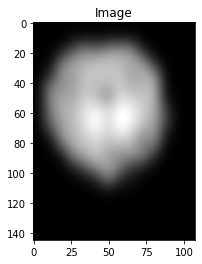

In [79]:
print("Image")
plt.imshow(image_array[0,image_array.shape[1]//2,...],cmap='gray')
plt.title("Image")

In [80]:
# image_tensor.shape

Output


Text(0.5, 1.0, 'Output')

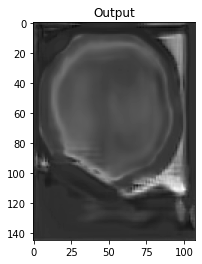

In [81]:
print("Output")
plt.imshow(output_array[0,0,output_array.shape[2]//2,...],cmap='gray')
plt.title("Output")

Target


Text(0.5, 1.0, 'Target')

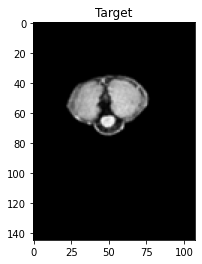

In [82]:
print("Target")
plt.imshow(target_array[0,40,...],cmap='gray')
plt.title("Target")

In [83]:
# for encoder in model.encoders:
#     for param in encoder.parameters():
#         param.requires_grad = False
#         param.fill_(0)
# for decoder in model.decoders:
#     for param in decoder.parameters():
#         param.requires_grad = False
#         param.fill_(0)

In [ ]:
model.logvar.bias

In [22]:
import torch.nn as nn
for x in model.modules():
    if isinstance(x, nn.Conv3d):
        print(x)
        x.requires_grad_(False)
        x.weight.fill_(0)

Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(128, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(384, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(128, 128, kernel_size=(3, 3, 3),

In [ ]:
model.train()

In [ ]:
if not UNET:
    for param in model.logvar.parameters():
        param.requires_grad = False
        param.fill_(-65535)
    output_0mu = engine(image_tensor)
    output_0mu_array = output_0mu.cpu().detach().numpy().astype(np.float32)
    output_0mu_image=sitk.GetImageFromArray(output_0mu_array)
    print("Output μ=0")
    
    fig,(ax1,ax2) = plt.subplots(1,2)
    im1 = ax1.imshow(output_array[0,0,40,...],cmap='gray')
    ax1.set_title("Output")

    im2 = ax2.imshow(output_0mu_array[0,0,40,...],cmap='gray')
    ax2.set_title("Output μ=0")
else:
    for param in model.encoders[0].parameters():
        param.requires_grad = False
        param.fill_(0)
    output_0latent = model(image_tensor)
    output_0latent_array = output_0latent.cpu().detach().numpy()
    output_0latent_image=sitk.GetImageFromArray(output_0latent_array)
    print("Output latent=0")

    fig,(ax1,ax2) = plt.subplots(1,2)
    im1 = ax1.imshow(output_array[0,0,40,...],cmap='gray')
    ax1.set_title("Output")

    im2 = ax2.imshow(output_0latent_array[0,0,40,...],cmap='gray')
    ax2.set_title("Output latent=0")
plt.savefig(OUTPUT_PREFIX+"_output.png")

In [ ]:
make_dot(output,params=dict(model.named_parameters())).render(OUTPUT_PREFIX+"_structure")

In [ ]:
UNET = False
CKPT_DIR = "/media/hdd/viscent/SR-UNet/experiments/output_vae_1024_t1/checkpoints/fold_0/199.pth"
OUTPUT_ROOT = "/media/hdd/viscent/SR-UNet/inference"
OUTPUT_PREFIX = input("B-UNet File prefix: ")
OUTPUT_PREFIX = os.path.join(OUTPUT_ROOT,OUTPUT_PREFIX)

if not UNET:
    model = BUNet3D(in_channels=1,
            out_channels=1,
            f_maps=[16, 32, 64, 128, 256],
            layer_order='gcr',
            num_groups=8,
            is_segmentation=False,
            latent_size=1024,
            alpha=0.00025,
            )
else:
    model = UNet3D(in_channels=1,
            out_channels=1,
            f_maps=[16, 32, 64, 128, 256],
            layer_order='gcr',
            num_groups=8,
            is_segmentation=False,
    )
ckpt = torch.load(CKPT_DIR)
if ckpt.get('model') is None:
    state_dict = ckpt['state_dict']
    _state_dict = {}
    for key in state_dict.keys():
        _state_dict[key.replace("model.","")] = state_dict[key]
    model.load_state_dict(_state_dict)
else:
    model.load_state_dict(ckpt["model"])

In [ ]:
encoder_weights = next(model.encoders[-1].parameters())
encoder_weights = encoder_weights.cpu().detach().numpy()
encoder_weights= np.expand_dims(encoder_weights,axis=1)
encoder_weights = np.repeat(encoder_weights, 128, axis=1)
if not UNET:
    fig,(ax1,ax2) = plt.subplots(1,2)
    im1 = ax1.imshow(encoder_weights)
    ax1.set_title("encoder weights")
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im1, cax=cax, orientation="vertical")

    latent_weights = next(model.mu.parameters())
    latent_weights = latent_weights.cpu().detach().numpy()
    latent_weights = np.repeat(latent_weights, 128, axis=1)

    im2 = ax2.imshow(latent_weights)
    ax2.set_title("latent weights")
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im2, cax=cax, orientation="vertical")
    fig.show()
else:
    fig = plt.imshow(encoder_weights)
    plt.title("encoder weights")
    plt.colorbar()
    plt.show()
plt.savefig(OUTPUT_PREFIX+"_encoder_weights.png")

In [ ]:
image = sitk.ReadImage("/media/hdd/viscent/SynthSR/generated_data_multimodal/0008_image_t1.nii.gz")
target = sitk.ReadImage("/media/hdd/viscent/SynthSR/generated_data_multimodal/0008_target.nii.gz")
image_array = sitk.GetArrayFromImage(image)
target_array = sitk.GetArrayFromImage(target)
image_tensor = torch.tensor(image_array).unsqueeze(0).unsqueeze(0)
target_tensor = torch.tensor(target_array).unsqueeze(0).unsqueeze(0)

In [ ]:
torch.cuda.set_device(0)
model.cuda()
model.train()
image_tensor = image_tensor.cuda()
target_tensor = target_tensor.cuda()
output = model(image_tensor)


In [ ]:
im = image_tensor
im_hat=output
mse = torch.nn.MSELoss()(im, im_hat)
print('mse:', mse.cpu().detach().numpy())
if not UNET:
    mu, logvar = model.enc_mu, model.enc_logvar
    kl = 0.5 * (logvar.exp() + mu**2 - 1 - logvar)
    kl = torch.sum(kl)
    FE_simple = mse + 0.00025 * kl
    print('kl:', kl.cpu().detach().numpy())
    print('Free energy:', FE_simple.cpu().detach().numpy())

In [ ]:
output_array = output.cpu().detach().numpy()
output_image=sitk.GetImageFromArray(output_array)
sitk.WriteImage(output_image,OUTPUT_PREFIX+"_output.nii")

In [ ]:
print("Image")
plt.imshow(image_array[40,...],cmap='gray')
plt.title("Image")

In [ ]:
print("Output")
plt.imshow(output_array[0,0,40,...],cmap='gray')
plt.title("Output")

In [ ]:
print("Target")
plt.imshow(target_array[40,...],cmap='gray')
plt.title("Target")

In [ ]:
if not UNET:
    for param in model.mu.parameters():
        param.requires_grad = False
        param.fill_(0)
    output_0mu = model(image_tensor)
    output_0mu_array = output_0mu.cpu().detach().numpy()
    output_0mu_image=sitk.GetImageFromArray(output_0mu_array)
    print("Output μ=0")
    
    fig,(ax1,ax2) = plt.subplots(1,2)
    im1 = ax1.imshow(output_array[0,0,40,...],cmap='gray')
    ax1.set_title("Output")

    im2 = ax2.imshow(output_0mu_array[0,0,40,...],cmap='gray')
    ax2.set_title("Output μ=0")
else:
    for param in model.encoders[0].parameters():
        param.requires_grad = False
        param.fill_(0)
    output_0latent = model(image_tensor)
    output_0latent_array = output_0latent.cpu().detach().numpy()
    output_0latent_image=sitk.GetImageFromArray(output_0latent_array)
    print("Output latent=0")

    fig,(ax1,ax2) = plt.subplots(1,2)
    im1 = ax1.imshow(output_array[0,0,40,...],cmap='gray')
    ax1.set_title("Output")

    im2 = ax2.imshow(output_0latent_array[0,0,40,...],cmap='gray')
    ax2.set_title("Output latent=0")
plt.savefig(OUTPUT_PREFIX+"_output_0.png")

In [ ]:
make_dot(output,params=dict(model.named_parameters())).render(OUTPUT_PREFIX+"_structure")